## Differential abundance analysis

In [104]:
import matplotlib
import matplotlib.pyplot as plt
import milopy
import milopy.core as milo
import scanpy as sc
import pandas as pd
plt.rcParams["figure.figsize"] = (7, 7)
import numpy as np
import milopy.plot as milopl
sc.settings.verbosity = 3
# from pybiomart import Dataset
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype'] = 42
import seaborn as sns

In [68]:
adata = sc.read_h5ad("dt_out/0_preprocessing/invivo_combined_post_manual_qc_hvg_norm_log1p_leiden_regressout_with_Annotations.h5ad")

/Users/yy8/miniconda/envs/sc/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Remove some of the dodgy cells

In [69]:
adata.obs['condition'] = adata.obs['Condition'].apply(lambda x: "Lesion" if x == "Lesion" else "control_naive").values

In [70]:
adata.obs[['Animal','condition','Batch']]

,Animal,condition,Batch
SLX-11523.i701_i502,E,Lesion,3
SLX-11523.i701_i503,E,Lesion,3
SLX-11523.i701_i504,E,Lesion,3
SLX-11523.i701_i505,E,Lesion,3
SLX-11523.i701_i506,E,Lesion,3
...,...,...,...
SLX-11520.i712_i505,D,control_naive,2
SLX-11520.i712_i506,D,control_naive,2
SLX-11520.i712_i507,D,control_naive,2
SLX-11520.i712_i508,D,control_naive,2


In [71]:
adata.obs['sample_col'] = adata.obs['Animal'].astype(str) + "_" + adata.obs['Condition'].astype(str)

In [72]:
sc.pp.neighbors(adata, n_neighbors=10)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [73]:
milo.make_nhoods(adata)

milo.count_nhoods(adata, sample_col="sample_col")

## Test for differential abundance between conditions
milo.DA_nhoods(adata, design="~ condition")

## Check results
milo_results = adata.uns["nhood_adata"].obs
milo_results

,index_cell,kth_distance,logFC,logCPM,F,PValue,FDR,SpatialFDR
0,SLX-11523.i702_i506,57.668774,5.658969,15.759719,11.188103,0.001251,0.008760,0.012216
1,SLX-11523.i703_i517,65.525795,6.998337,15.940070,15.743011,0.000161,0.002257,0.003111
2,SLX-11523.i704_i506,57.263527,6.175672,16.131666,17.538912,0.000072,0.002257,0.002932
3,SLX-11523.i708_i502,56.826683,-2.410784,15.522257,1.937420,0.167516,0.633173,0.665778
4,SLX-11523.i708_i506,67.666565,-0.266306,15.121476,0.024099,0.876978,0.979938,0.971629
5,SLX-11523.i708_i507,59.716000,0.007838,15.653484,0.000002,0.998974,0.998974,0.998974
6,SLX-11523.i709_i505,24.375681,-0.896383,15.800334,0.337543,0.562680,0.979938,0.971629
7,SLX-11523.i710_i504,64.914261,-1.057950,14.891522,0.306308,0.581330,0.979938,0.971629
8,SLX-11523.i711_i503,27.709179,0.264343,16.179594,0.050071,0.823447,0.979938,0.971629
9,SLX-11519.i702_i504,42.727337,6.002845,15.306455,16.515764,0.000111,0.002257,0.002932


/Users/yy8/miniconda/envs/sc/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


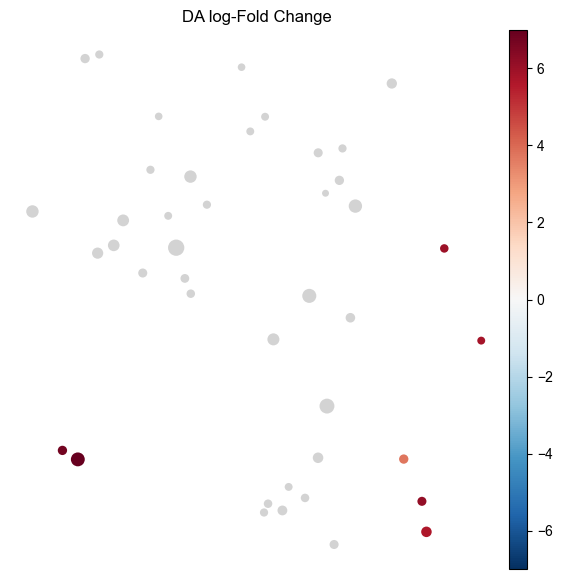

In [74]:
milopy.utils.build_nhood_graph(adata)
milopy.plot.plot_nhood_graph(adata)

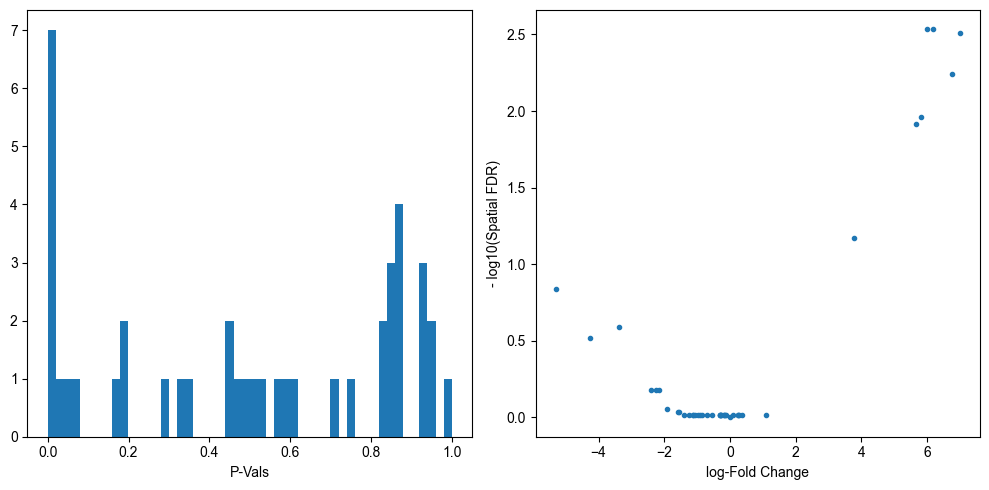

In [75]:
old_figsize = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = [10,5]
plt.subplot(1,2,1)
plt.hist(adata.uns["nhood_adata"].obs.PValue, bins=50);
plt.xlabel("P-Vals");
plt.subplot(1,2,2)
plt.plot(adata.uns["nhood_adata"].obs.logFC, -np.log10(adata.uns["nhood_adata"].obs.SpatialFDR), '.');
plt.xlabel("log-Fold Change");
plt.ylabel("- log10(Spatial FDR)");
plt.tight_layout()
plt.rcParams["figure.figsize"] = old_figsize

In [76]:
-np.log10(0.15)

0.8239087409443188

/Users/yy8/miniconda/envs/sc/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/yy8/miniconda/envs/sc/lib/python3.8/site-packages/anndata/_core/anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


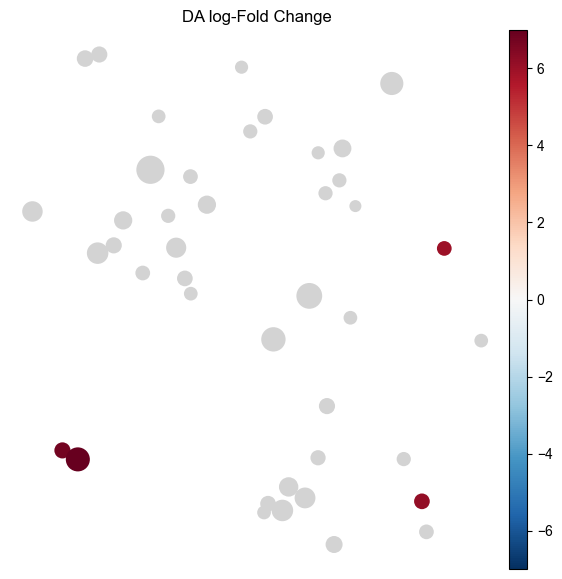

In [116]:
milopl.plot_nhood_graph(adata, 
                        alpha=0.01, ## SpatialFDR level (1%) 
                        min_size=30, ## Size of smallest dot,
                        # basis = "X_pca"
                        save="_milo_output_K10_FDR001_nhoods.pdf"
                       )

In [89]:
milo_results_sig = milo_results[milo_results['SpatialFDR']<0.01]

In [90]:
milo_results_sig

,index_cell,kth_distance,logFC,logCPM,F,PValue,FDR,SpatialFDR,Nhood_size
1,SLX-11523.i703_i517,65.525795,6.998337,15.940070,15.743011,0.000161,0.002257,0.003111,17.0
2,SLX-11523.i704_i506,57.263527,6.175672,16.131666,17.538912,0.000072,0.002257,0.002932,20.0
9,SLX-11519.i702_i504,42.727337,6.002845,15.306455,16.515764,0.000111,0.002257,0.002932,14.0
26,SLX-11522.i703_i503,67.432312,6.767075,15.770686,13.839846,0.000375,0.003941,0.005729,14.0


In [91]:
enriched_cells_high_index = milo_results_sig.index.values.astype(int)

In [92]:
enriched_cells_high_index

array([ 1,  2,  9, 26])

In [93]:
enriched_cells_high_df = pd.DataFrame.sparse.from_spmatrix(adata.obsm["nhoods"][:,enriched_cells_high_index])

In [94]:
enriched_cells_high_cells_column = ~(enriched_cells_high_df == 0).all(axis=1)
enriched_cells_high_df = enriched_cells_high_df.loc[~(enriched_cells_high_df == 0).all(axis=1)]

In [95]:
adata.obs['seq'] = range(0, len(adata.obs))

In [96]:
adata.obs['milo_enriched'] = enriched_cells_high_cells_column.values.astype("object")

In [97]:
adata.obs['milo_enriched'] = adata.obs['milo_enriched'].astype("category")

/Users/yy8/miniconda/envs/sc/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


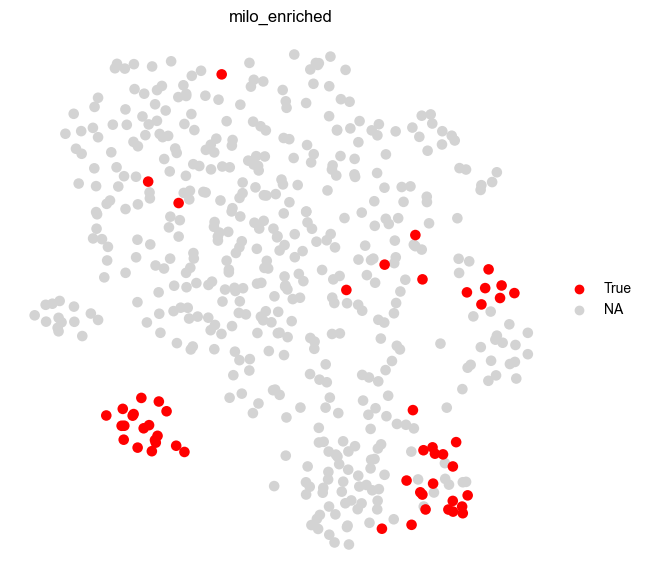

In [99]:
palette={ True: "red", False: "lightgrey"}

sc.pl.umap(adata, color = "milo_enriched", groups = [True],palette = palette, frameon=False, save="_milo_output_K10_FDR001.pdf")

In [100]:
milo_results.to_csv("dt_out/1_invivo_analysis/milo_output_K10_FDR001_index_cell_only.csv")

In [ ]:
milopy.utils.annotate_nhoods(adata, anno_col='celltype')

In [113]:
adata.uns['nhood_adata'].obs

,index_cell,kth_distance,logFC,logCPM,F,PValue,FDR,SpatialFDR,Nhood_size,nhood_annotation,nhood_annotation_frac
0,SLX-11523.i702_i506,57.668774,5.658969,15.759719,11.188103,0.001251,0.008760,0.012216,15.0,OPC progenitor,1.000000
1,SLX-11523.i703_i517,65.525795,6.998337,15.940070,15.743011,0.000161,0.002257,0.003111,17.0,OPC Schwann-primed,1.000000
2,SLX-11523.i704_i506,57.263527,6.175672,16.131666,17.538912,0.000072,0.002257,0.002932,20.0,OPC progenitor,1.000000
3,SLX-11523.i708_i502,56.826683,-2.410784,15.522257,1.937420,0.167516,0.633173,0.665778,32.0,OPC progenitor,0.937500
4,SLX-11523.i708_i506,67.666565,-0.266306,15.121476,0.024099,0.876978,0.979938,0.971629,15.0,OPC progenitor,1.000000
5,SLX-11523.i708_i507,59.716000,0.007838,15.653484,0.000002,0.998974,0.998974,0.998974,30.0,OPC progenitor,1.000000
6,SLX-11523.i709_i505,24.375681,-0.896383,15.800334,0.337543,0.562680,0.979938,0.971629,41.0,OPC OL-primed,1.000000
7,SLX-11523.i710_i504,64.914261,-1.057950,14.891522,0.306308,0.581330,0.979938,0.971629,13.0,OPC progenitor,1.000000
8,SLX-11523.i711_i503,27.709179,0.264343,16.179594,0.050071,0.823447,0.979938,0.971629,46.0,OPC OL-primed,0.891304
9,SLX-11519.i702_i504,42.727337,6.002845,15.306455,16.515764,0.000111,0.002257,0.002932,14.0,OPC OL-primed,1.000000


<Axes: xlabel='nhood_annotation', ylabel='logFC'>

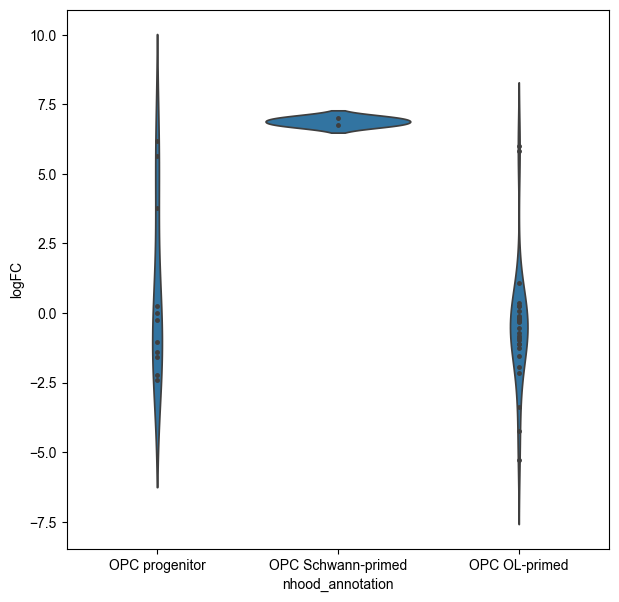

In [115]:
sns.violinplot(data=adata.uns['nhood_adata'].obs, x="nhood_annotation", y="logFC", inner="point")